### Customer Churn Prediction Project

#### Introduction
Customer churn is a critical issue for many businesses, particularly those that rely on subscription models. Churn occurs when customers stop doing business with a company over a given period. Predicting churn can help companies take proactive measures to retain customers and reduce loss of revenue. This project aims to develop a machine learning model to predict customer churn based on historical data.

#### Steps to Tackle the Problem
1. **Data Collection**: Gather historical customer data that includes various features such as demographic information, service usage patterns, and account information.
2. **Data Preprocessing**: Clean the data by handling missing values, encoding categorical variables, and normalizing numerical features.
3. **Exploratory Data Analysis (EDA)**: Perform EDA to understand the data distribution, detect patterns, and identify important features.
4. **Feature Engineering**: Create new features that might be useful for prediction based on domain knowledge.
5. **Model Selection**: Choose appropriate machine learning algorithms for the prediction task.
6. **Model Training**: Train the selected models using the preprocessed data.
7. **Model Evaluation**: Evaluate the performance of the models using appropriate metrics and select the best-performing model.
8. **Model Deployment**: Deploy the model for making predictions on new data.

#### Libraries Used
- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical computations.
- **Matplotlib/Seaborn**: For data visualization.
- **Scikit-learn**: For machine learning algorithms and model evaluation.
- **TensorFlow/Keras**: For building and training neural networks (if deep learning is used).


In [154]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras 


# for classification report 
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn


In [113]:
df = pd.read_csv("./data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6838,2025-JKFWI,Male,0,No,No,13,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,99.00,1301.7,Yes
5439,5959-BELXA,Male,1,No,No,32,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),96.15,3019.25,Yes
3044,5692-FPTAH,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,45.40,45.4,Yes
5278,1061-PNTHC,Female,0,Yes,Yes,56,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,109.60,5953,No
668,3859-CVCET,Female,0,No,No,4,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,45.65,191.05,Yes


In [114]:
# remove customer id since it is useless for our model
df.drop('customerID', axis = 'columns', inplace = True)

df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [115]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [116]:
pd.to_numeric(df.TotalCharges, errors= 'coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [117]:
df = df[df.TotalCharges != " "]
df.TotalCharges = pd.to_numeric(df.TotalCharges)


In [118]:
df.TotalCharges.dtypes

dtype('float64')

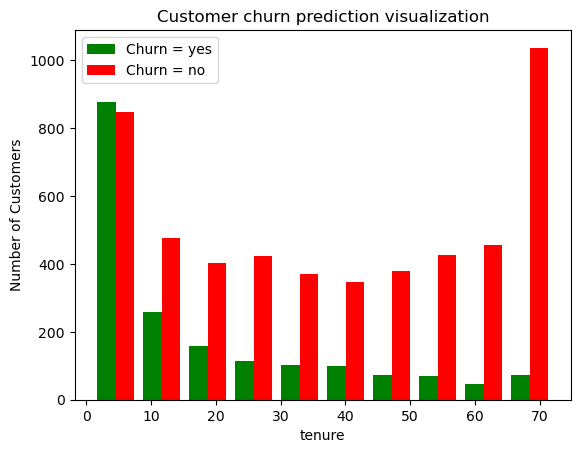

In [119]:
# tenure seems interesting, lets check how many of the loyal customers are not leaving

tenure_churn_no , tenure_churn_yes = df[df.Churn == 'No'].tenure ,  df[df.Churn == 'Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer churn prediction visualization')

plt.hist([tenure_churn_yes, tenure_churn_no], color= ['green', 'red'], label=['Churn = yes', "Churn = no"])
plt.legend()


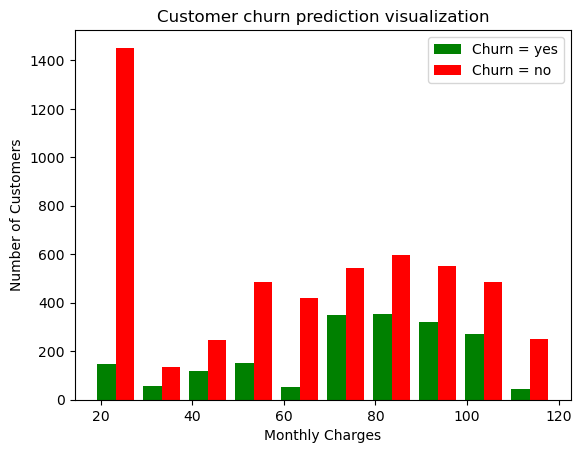

In [120]:
mc_churn_no , mc_churn_yes = df[df.Churn == 'No'].MonthlyCharges ,  df[df.Churn == 'Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer churn prediction visualization')

plt.hist([mc_churn_yes, mc_churn_no], color= ['green', 'red'], label=['Churn = yes', "Churn = no"])
plt.legend()

In [121]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')



In [122]:
print_unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [123]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [124]:
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines','OnlineSecurity','OnlineBackup',
               'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_cols:
    df[col].replace({'Yes': 1, "No": 0}, inplace=True)

In [125]:
df['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

In [126]:
# one hot encoding
df = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'])


In [127]:
# Scaling
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [128]:
#  train and split
X , y = df.drop('Churn', axis = 'columns'), df['Churn']


In [129]:
# 80, 20 split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)


In [133]:
model = keras.Sequential([
    # input layer
    keras.layers.Dense(20, input_shape = (26, ), activation='relu'),
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step - accuracy: 0.6306 - loss: 0.6206
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.7823 - loss: 0.4482
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.8033 - loss: 0.4221
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.7960 - loss: 0.4244
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.8023 - loss: 0.4194
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.8045 - loss: 0.4187
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.8012 - loss: 0.4181
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.8083 - loss: 0.4068
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.8135 - loss: 0.4043
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.8062 - loss: 0.4116
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.8105 - loss: 0.4025
Epoch 12/100
176/17

In [134]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.7860 - loss: 0.4452


[0.4548276364803314, 0.7803837656974792]

In [135]:
# yp = y predictedeva
yp = model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step


array([[0.25906318],
       [0.5083206 ],
       [0.00942858],
       [0.7932367 ],
       [0.49167916]], dtype=float32)

In [150]:
# round values to 0 or 1 
y_pred = [int(round(float(element))) for element in yp]


[0, 1, 0, 1, 0, 1, 0, 0, 0]

In [153]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       999
           1       0.66      0.49      0.56       408

    accuracy                           0.78      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

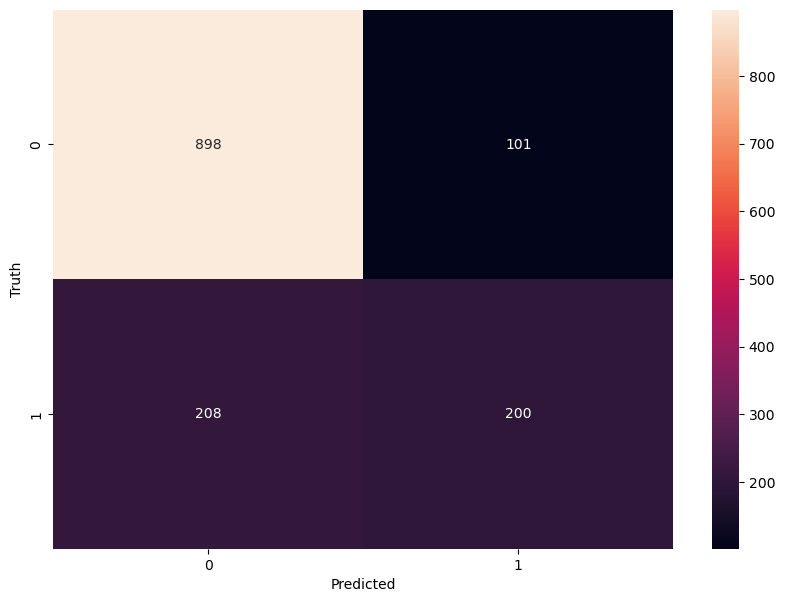

In [155]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')